In [1]:
import tensorflow as tf
import matplotlib.image as mp
import matplotlib.pyplot as plt
import os


In [2]:
filename = "./DandelionFlower.jpg"

In [3]:
image = mp.imread(filename)

In [4]:
print("Image Shape: ", image.shape)
print("Image Array: ", image)

Image Shape:  (1413, 1765, 3)
Image Array:  [[[100  83  53]
  [ 95  80  51]
  [ 88  72  46]
  ...
  [ 47  46   0]
  [ 51  49   1]
  [ 50  48   0]]

 [[ 94  77  49]
  [ 99  84  55]
  [ 95  80  51]
  ...
  [ 49  46   0]
  [ 52  49   0]
  [ 54  48   0]]

 [[ 97  80  50]
  [ 99  84  53]
  [ 94  81  49]
  ...
  [ 52  45   0]
  [ 55  48   2]
  [ 57  49   3]]

 ...

 [[ 22  15   0]
  [ 22  14   1]
  [ 21  13   0]
  ...
  [  5   4   0]
  [  5   4   0]
  [  4   3   0]]

 [[ 21  15   1]
  [ 20  14   0]
  [ 19  13   1]
  ...
  [  4   5   0]
  [  4   5   0]
  [  4   5   0]]

 [[ 18  15   0]
  [ 18  12   0]
  [ 18  12   0]
  ...
  [  2   4   0]
  [  2   4   0]
  [  3   4   0]]]


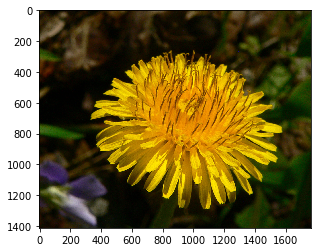

In [8]:
plt.imshow(image)

plt.show()

In [9]:
x = tf.Variable(image, name = "x")

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
init = tf.global_variables_initializer()

Transposed Image Shape:  (1765, 1413, 3)


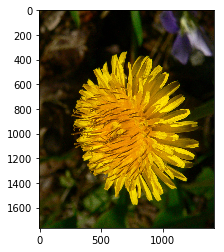

In [13]:
with tf.Session() as sess:
    sess.run(init)
    
    #transpose = tf.transpose(x, perm = [1,0,2])
    transpose = tf.image.transpose_image(x)
    result = sess.run(transpose)
    
    print("Transposed Image Shape: ", result.shape)
    
    plt.imshow(result)
    plt.show()

In [14]:
from PIL import Image

In [20]:
original_image_list = ["./DandelionFlower.jpg",
                       "./F_65219.jpg",
                       "./linkedin-resume-icon-14.jpg",
                       "./Invoice # GM-PO-14182405 (2)-page-001.jpg"]

In [29]:
# make a queue of the filenames including all the images.
f_queue = tf.train.string_input_producer(original_image_list)

#to read an entire image fie
image_reader = tf.WholeFileReader() 

In [36]:
with tf.Session() as sess:
    
    #co-ordinate the loading of images
    coord = tf.train.Coordinator()
    #kickstart all the images within queue
    threads = tf.train.start_queue_runners(sess = sess, coord = coord)
    #store all the tesnsors 
    image_list = [];
    for i in range(len(original_image_list)): #to dequeue from the queue
        #read the whole file from the queue, 
        #the first field in the tuple is the filename which we will ignore, the next field is the actual image file
        _, image_file = image_reader.read(f_queue) #returns a tuple
        
        #decode these image files as tensors
        image = tf.image.decode_jpeg(image_file)
        
        #let us resize images to get a tensor of resized images
        image = tf.image.resize_images(image, [224,224])
        
        #set width, height and no. of channels
        image.set_shape((224,224,3))
        
        image = tf.image.flip_up_down(image)
        
        image = tf.image.central_crop(image, central_fraction = 0.6)
        
        #execution
        image_array = sess.run(image) # will use image resize
        print(image_array.shape)
        
        #use Pillow Library to display the resized image on screen
        #Image.fromarray(image_array.astype("uint8"), "RGB").show()
        
        #converts a NumPy array to a tensor of shape (224,224,3)
        image_tensor = tf.stack(image_array)
        
        #expand the no of dimensions, converts a 3-D image tensor to 4-D image tensor
        #first image indicates which image I am referencing
        #remaining 3 dimensions describe that image
        #useful when we have lists of images
        #image_list.append(tf.expand_dims(image_array,0))
        
        print(image_tensor)
        image_list.append(image_tensor)
    
    #now, finish off the execution of the coordinator
    coord.request_stop() #stop all the threads
    coord.join(threads) #wait for all threads to complete
    
    #convert all tensors to a single tensor with 4th Dimension
    #4 images of (224,224,3) can be accessed as (0,224,224,3),.... etc
    images_tensor = tf.stack(image_list)
    print(images_tensor)
    
    #write out image summaries in tensorboard
    #index = 0 #give each image file a new name
    
    #write image summary
    #summary_writer = tf.summary.FileWriter("./m4_example2", graph = sess.graph)
    
    #to iterate through every tensor
    #for image_tensor in image_list:
        #write a summary statistic for every image
        #summary_str = sess.run(tf.summary.image("image- " + str(index), image_tensor))
        
        #summary_writer.add_summary(summary_str)
        #index += 1 #to deal with the next image
    #summary_writer.close()

(136, 136, 3)
Tensor("stack_50:0", shape=(136, 136, 3), dtype=float32)
(136, 136, 3)
Tensor("stack_51:0", shape=(136, 136, 3), dtype=float32)
(136, 136, 3)
Tensor("stack_52:0", shape=(136, 136, 3), dtype=float32)
(136, 136, 4)
Tensor("stack_53:0", shape=(136, 136, 4), dtype=float32)


ValueError: Dimension 2 in both shapes must be equal, but are 3 and 4. Shapes are [136,136,3] and [136,136,4].
	From merging shape 2 with other shapes. for 'stack_55' (op: 'Pack') with input shapes: [136,136,3], [136,136,3], [136,136,3], [136,136,4].